In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
# Create a file path
curr_dir = os.getcwd()
file_name = 'medical_clean.csv'
file_path = os.path.join(curr_dir, file_name)

# Load the medical data set
medical_df = pd.read_csv(file_path)
medical_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


**<h3>Research Question</h3>**
- What factors have the most significant influence on a patient's average daily hospital charges?

**<h3>Data Preparation</h3>**

**<h4>Necessary Variables</h4>**
- **Target**: *TotalCharge*
- **Features**: 
	- Demographic Info: *Area, Age, Income, Gender*
	- Medical Conditions: *HighBlood, Stroke, Complication_risk, Overweight, Arthritis, Diabetes, Hyperlipidemia, BackPain, Anxiety, Allergic_rhinitis, Reflux_esophagitis, Asthma*
	- Others: *Doc_visits, VitD_supp, Initial_admin, Services, Initial_days*

**<h4>Exploratory Data Analysis (EDA)</h4>**
- Identify data types, null values, and inconsistent naming
- Descriptive Statistics
	- Identify outliers for numerical variables (Boxplot)
	- Summary statistics (mean, standard deviation, Min/Max)
	- Data distribution (Histogram, Bar chart)

**<h4>Feature Engineering</h4>**
- One-Hot Encoding
	- Encode categorical features into numeric format
- SelectKBest
	- Identify feature scores
	- Select relevant features to the target variable (TotalCharge)

In [43]:
# Variable Selection
data_df = medical_df[['TotalCharge', 'Area', 'Age', 'Income', 'Gender', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Doc_visits', 'vitD_supp', 'Initial_admin', 'Services', 'Initial_days']]

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TotalCharge         10000 non-null  float64
 1   Area                10000 non-null  object 
 2   Age                 10000 non-null  int64  
 3   Income              10000 non-null  float64
 4   Gender              10000 non-null  object 
 5   HighBlood           10000 non-null  object 
 6   Stroke              10000 non-null  object 
 7   Complication_risk   10000 non-null  object 
 8   Overweight          10000 non-null  object 
 9   Arthritis           10000 non-null  object 
 10  Diabetes            10000 non-null  object 
 11  Hyperlipidemia      10000 non-null  object 
 12  BackPain            10000 non-null  object 
 13  Anxiety             10000 non-null  object 
 14  Allergic_rhinitis   10000 non-null  object 
 15  Reflux_esophagitis  10000 non-null  object 
 16  Asthm

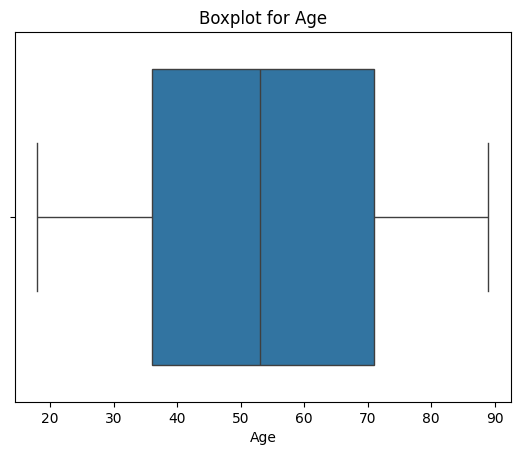

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64


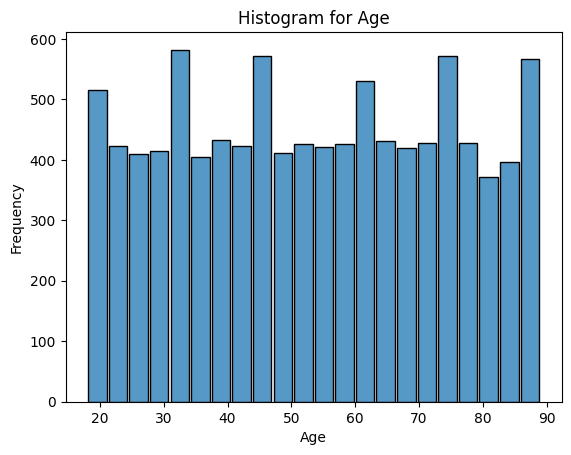

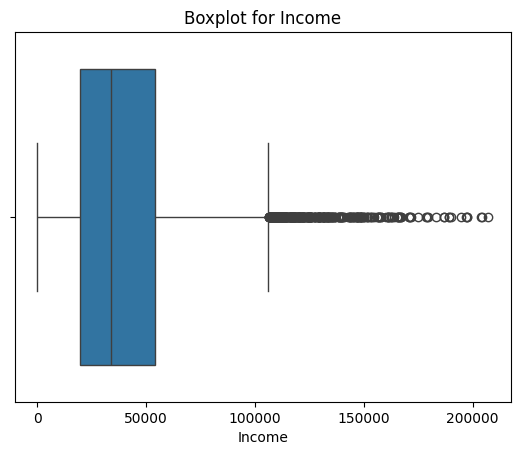

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64


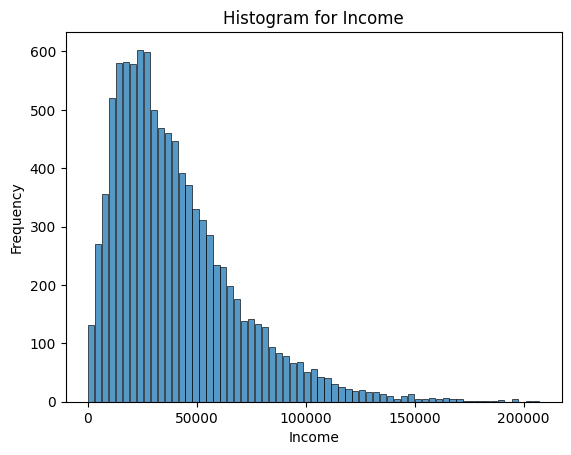

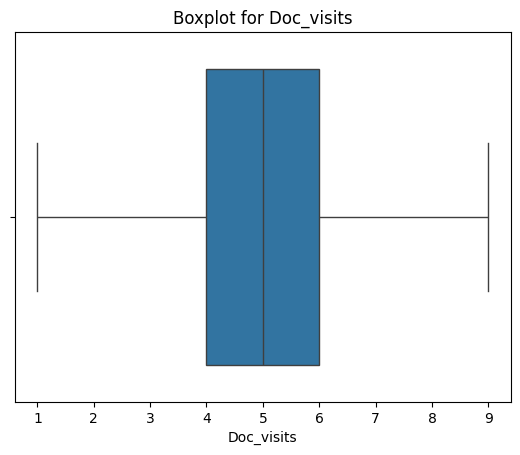

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64


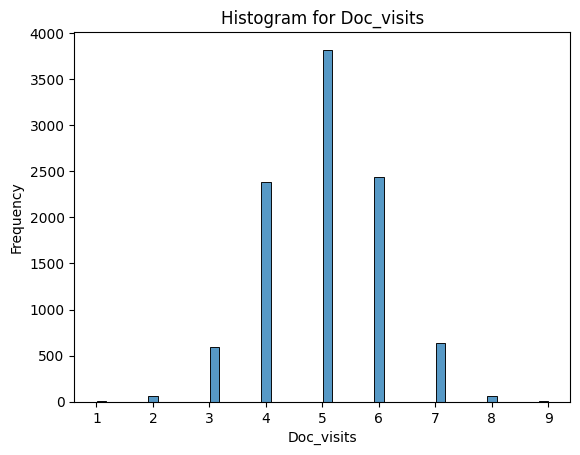

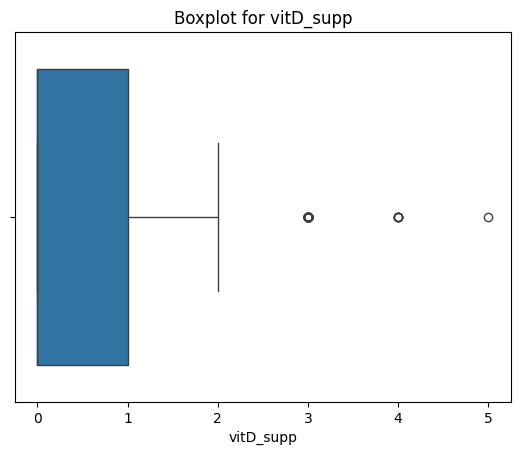

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64


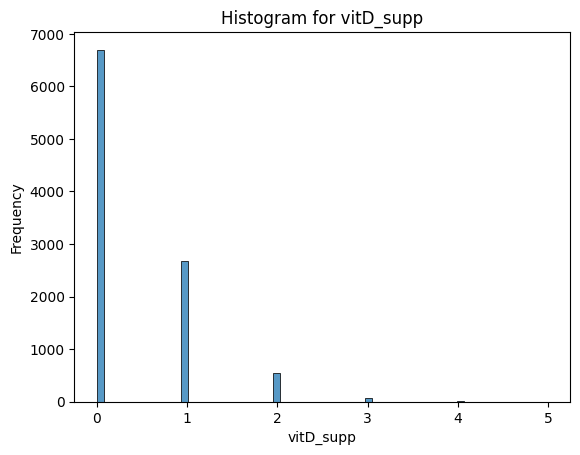

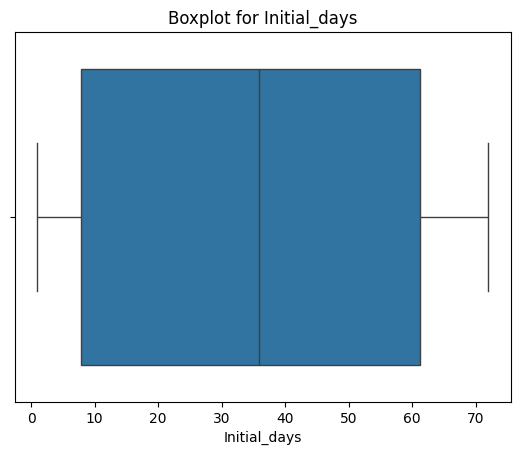

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64


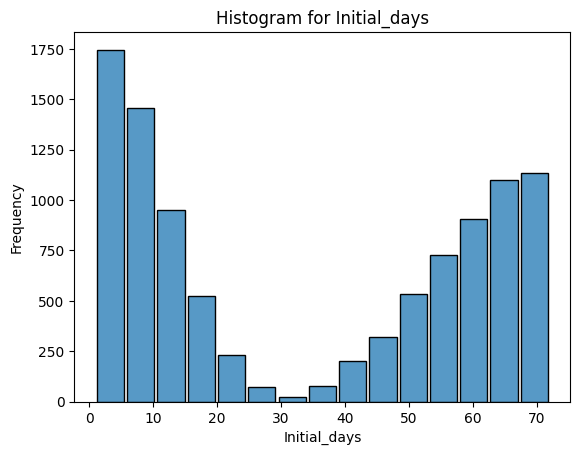

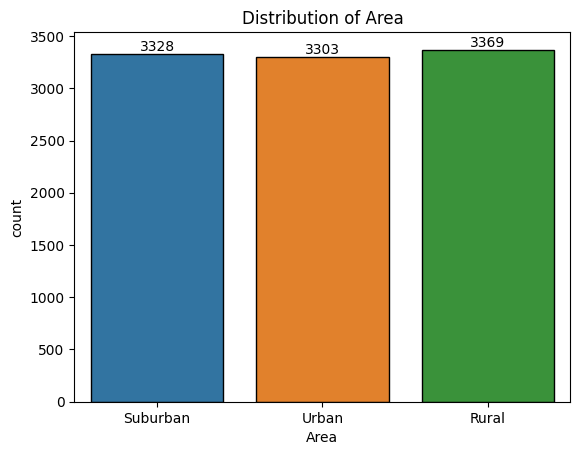

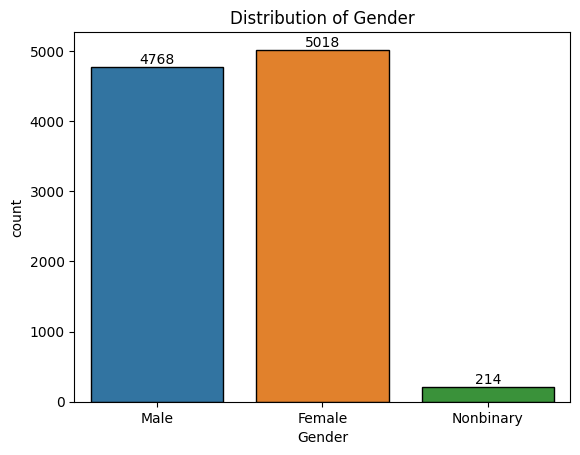

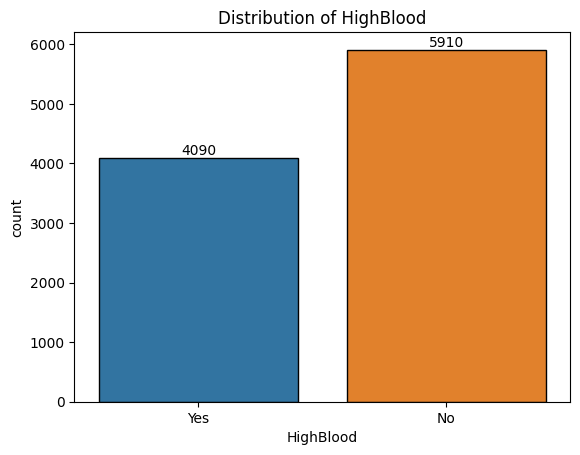

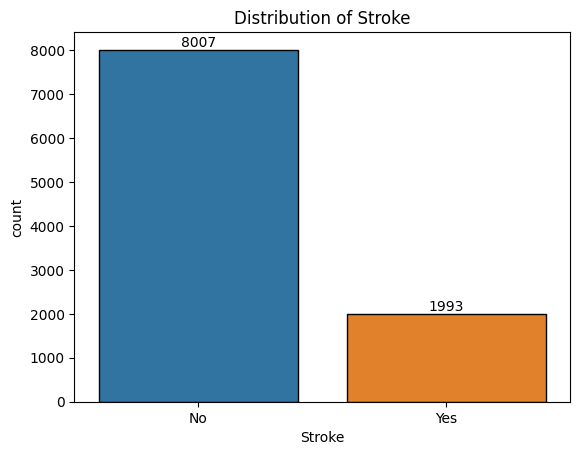

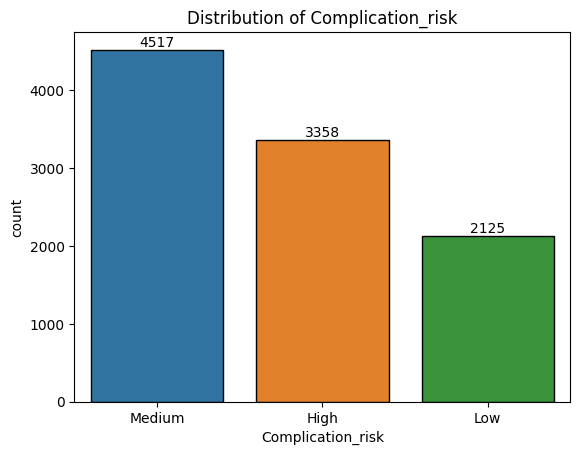

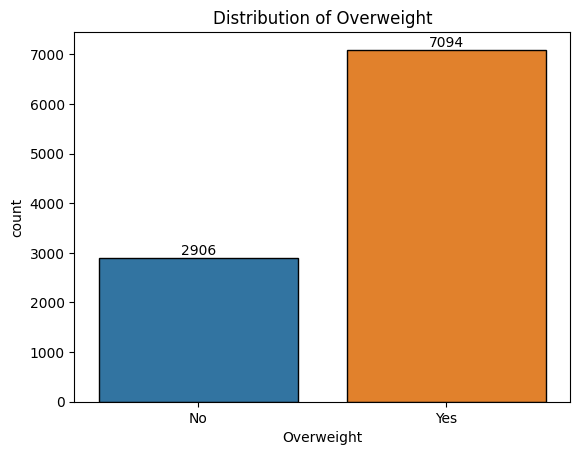

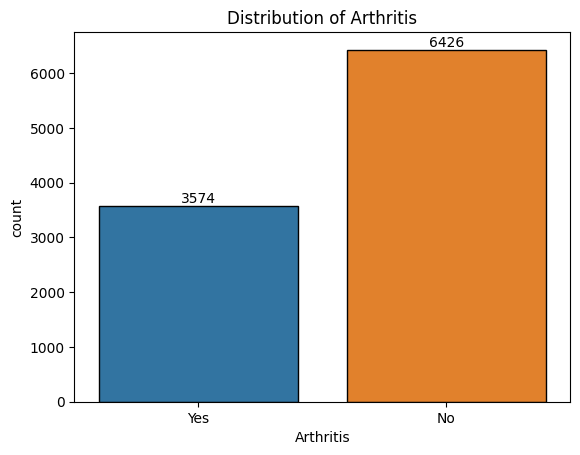

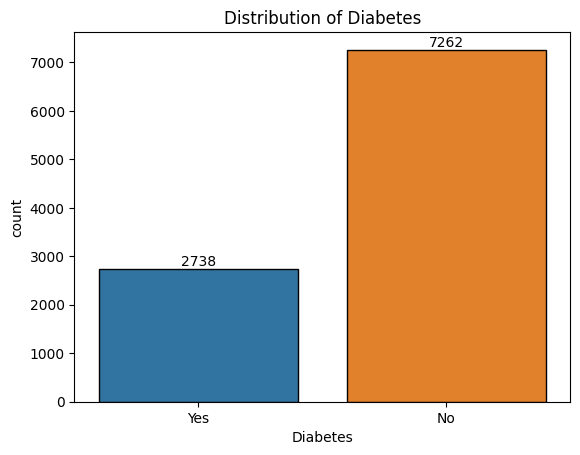

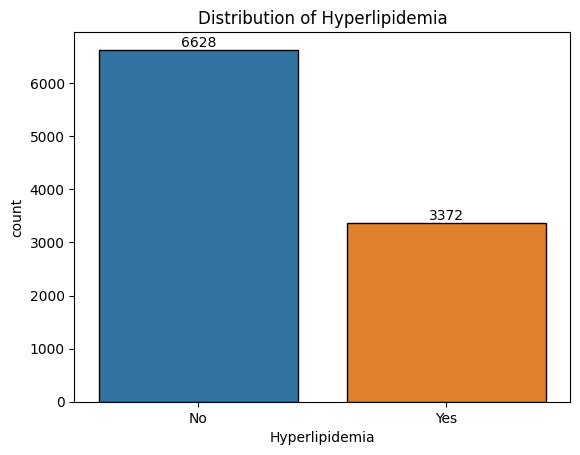

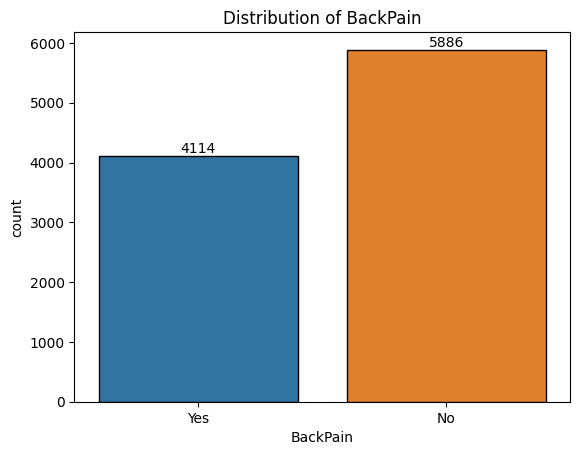

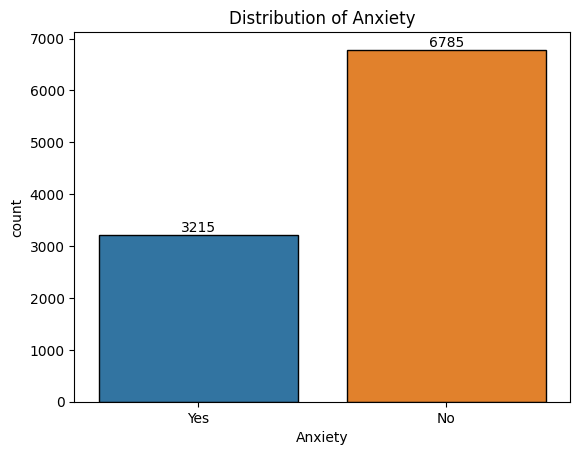

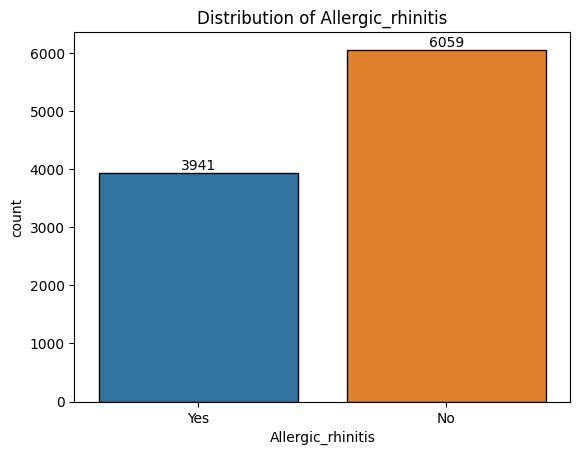

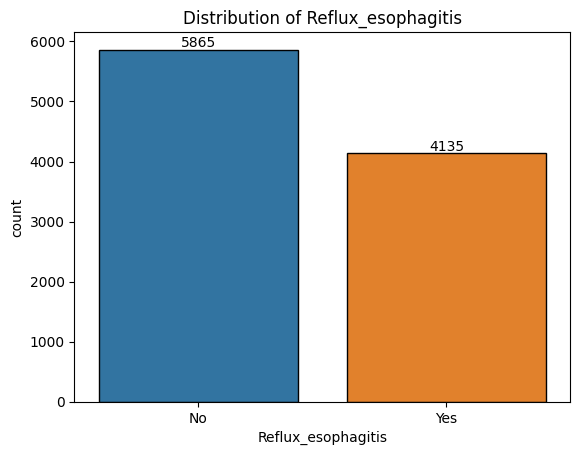

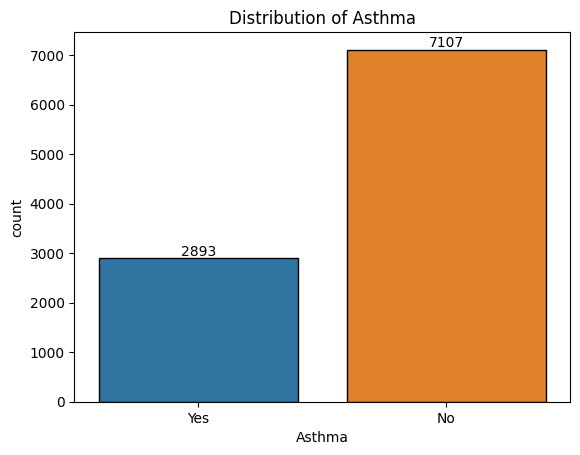

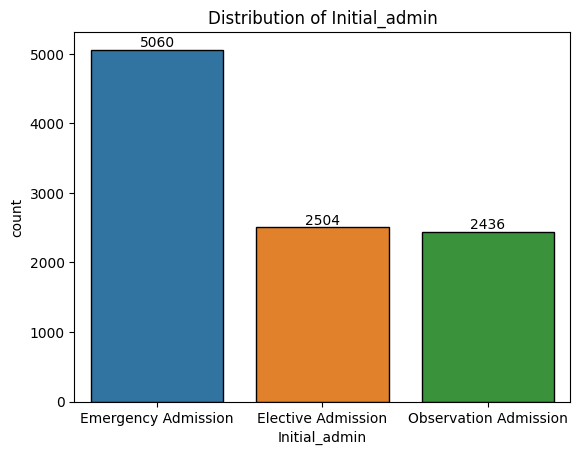

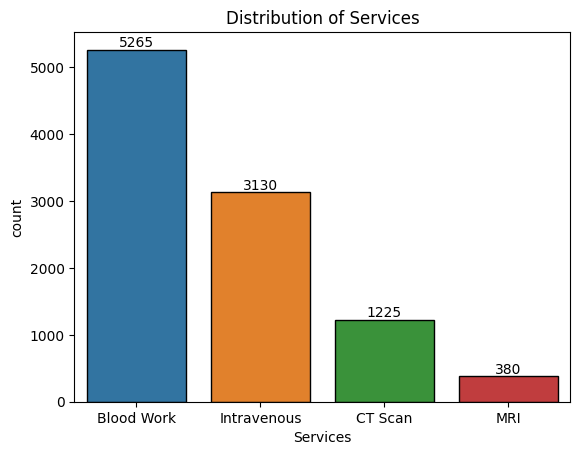

In [44]:
# Descriptive Statistics
# Continuous features
cont_list = ['Age', 'Income', 'Doc_visits', 'vitD_supp', 'Initial_days']
for col in cont_list:
    sns.boxplot(x=data_df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()
    
    print(data_df[col].describe())
    
    sns.histplot(data=data_df[col], shrink=0.9, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {col}')
    plt.show()

# Categorical features
cat_list = ['Area', 'Gender', 'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Initial_admin', 'Services']
for col in cat_list:    
    ax = sns.countplot(x=data_df[col], hue=col, data=data_df[cat_list], edgecolor='black')
    for i in ax.containers:
        ax.bar_label(i,)
    plt.title(f'Distribution of {col}')
    plt.show()

In [45]:
# Encode categorical variables

# Divide categorical data (Binary vs. Non-binary)
binary_data = []
nonBinary_data = []

categorical_list = data_df.select_dtypes(include=['object']).columns
for col in categorical_list:
    if (len(data_df[col].unique()) == 2):
        binary_data.append(col)
    else:
        nonBinary_data.append(col)

# Initialize the encoder
encoder_binary = OneHotEncoder(sparse_output=False, drop='if_binary')
encoder_nonbinary = OneHotEncoder(sparse_output=False)

# Binary
encoded_binary = encoder_binary.fit_transform(data_df[binary_data])
encoded_binary_cols = encoder_binary.get_feature_names_out(binary_data)
encoded_binary_df = pd.DataFrame(encoded_binary, columns=encoded_binary_cols)

# NonBinary
encoded_nonbinary = encoder_nonbinary.fit_transform(data_df[nonBinary_data])
encoded_nonbinary_cols = encoder_nonbinary.get_feature_names_out(nonBinary_data)
encoded_nonbinary_df = pd.DataFrame(encoded_nonbinary, columns=encoded_nonbinary_cols)

encoded_df = pd.concat([encoded_binary_df, encoded_nonbinary_df], axis=1)
encoded_df

,HighBlood_Yes,Stroke_Yes,Overweight_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,BackPain_Yes,Anxiety_Yes,Allergic_rhinitis_Yes,Reflux_esophagitis_Yes,...,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9996,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [46]:
cleaned_features_df = pd.concat([data_df[cont_list], encoded_df], axis=1)

# [In-text Citation: (D, 2023)]
# Target
target = data_df['TotalCharge']
# Features
features = cleaned_features_df

selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(features, target)

# Display feature scores
feature_scores = selector.scores_
feature_names = features.columns.values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores})
feature_scores_df['Score'] = feature_scores_df['Score'].round(3)
print('Feature Scores')
print(feature_scores_df, '\n')

# Eliminate irrelevant features (feature score = 0)
selected_features_df = feature_scores_df[feature_scores_df['Score'] != 0]
print('Selected Features')
print(selected_features_df)

Feature Scores
                                Feature  Score
0                                   Age  0.004
1                                Income  0.000
2                            Doc_visits  0.007
3                             vitD_supp  0.000
4                          Initial_days  1.535
5                         HighBlood_Yes  0.011
6                            Stroke_Yes  0.000
7                        Overweight_Yes  0.000
8                         Arthritis_Yes  0.002
9                          Diabetes_Yes  0.008
10                   Hyperlipidemia_Yes  0.009
11                         BackPain_Yes  0.000
12                          Anxiety_Yes  0.013
13                Allergic_rhinitis_Yes  0.000
14               Reflux_esophagitis_Yes  0.000
15                           Asthma_Yes  0.000
16                           Area_Rural  0.000
17                        Area_Suburban  0.000
18                           Area_Urban  0.000
19                        Gender_Female  0.00

In [47]:
# Export a cleaned dataset
final_df = pd.concat([data_df['TotalCharge'], cleaned_features_df[selected_features_df['Feature'].values.tolist()]], axis=1)

# Export as a CSV file
final_df.to_csv('cleaned_task2.csv', index=False, header=True, encoding='utf-8')

# Check if the file exists
if os.path.exists('cleaned_task2.csv'):
    print(f"File was successfully exported.")
else:
    print(f"File was NOT exported.")
    
final_df

File was successfully exported.


,TotalCharge,Age,Doc_visits,Initial_days,HighBlood_Yes,Arthritis_Yes,Diabetes_Yes,Hyperlipidemia_Yes,Anxiety_Yes,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_MRI
0,3726.702860,53,6,10.585770,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,4193.190458,51,4,15.129562,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2434.234222,53,4,4.772177,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,2127.830423,78,4,1.714879,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2113.073274,22,5,1.254807,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6850.942000,25,4,51.561220,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
9996,7741.690000,87,5,68.668240,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9997,8276.481000,45,4,70.154180,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,7644.483000,43,5,63.356900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [48]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   TotalCharge                          10000 non-null  float64
 1   Age                                  10000 non-null  int64  
 2   Doc_visits                           10000 non-null  int64  
 3   Initial_days                         10000 non-null  float64
 4   HighBlood_Yes                        10000 non-null  float64
 5   Arthritis_Yes                        10000 non-null  float64
 6   Diabetes_Yes                         10000 non-null  float64
 7   Hyperlipidemia_Yes                   10000 non-null  float64
 8   Anxiety_Yes                          10000 non-null  float64
 9   Complication_risk_High               10000 non-null  float64
 10  Complication_risk_Low                10000 non-null  float64
 11  Complication_risk_Medium     

**<h3>Random Forest Regression</h3>**
- Splitting dataset - train (80%), test(20%)
- Make predictions using the Random Forest Regression model
- Evaluate model performance
	- Mean Squared Error (MSE)
	- Root Mean Squared Error (RMSE)
	- R-squared
- Feature importance
	- Identify the key features

In [49]:
# Target and Features
X = final_df.iloc[:, 1:]
y = final_df['TotalCharge']

# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Export each train and test set
X_train.to_csv('X_train_task2.csv', index=False)
X_test.to_csv('X_test_task2.csv', index=False)
y_train.to_csv('y_train_task2.csv', index=False)
y_test.to_csv('y_test_task2.csv', index=False)

In [32]:
# [In-text Citation: (Sumbatilinda, 2024)]
# [In-text Citation : (Koehrsen, 2019)]

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'max_features': [2, 3, 4, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor()

# Initiate the GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Display the results
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 400}
Best Estimator: RandomForestRegressor(max_depth=30, max_features=None, min_samples_leaf=2,
                      n_estimators=400)
Best score: -6957.758228099336


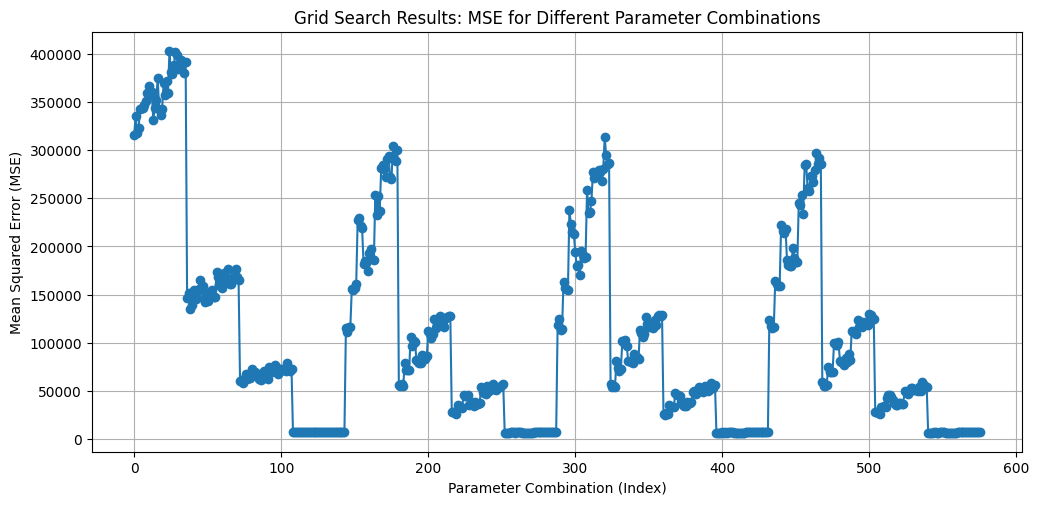

,param_n_estimators,param_max_depth,param_max_features,param_min_samples_split,param_min_samples_leaf,mean_test_score
411,400,30,None,2,2,-6957.758228
267,400,20,None,2,2,-6960.428901
555,400,None,None,2,2,-6963.156970
265,200,20,None,2,2,-6965.046899
410,300,30,None,2,2,-6969.832108
...,...,...,...,...,...,...
35,400,10,2,10,4,-391234.625827
32,100,10,2,10,4,-393385.911733
29,200,10,2,5,4,-398138.027403
28,100,10,2,5,4,-401518.750663


In [50]:
# Get results
results = grid_search.cv_results_
# Create a dataframe for cv_results_
results_df = pd.DataFrame(results)

# Visualize scores for different max_depth values [In-text Citation: (GeeksforGeeks, 2024b)]
mean_scores = -results['mean_test_score'] # Convert to positive
fig = plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(range(len(results_df)), -results_df['mean_test_score'], marker='o')
plt.xlabel('Parameter Combination (Index)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Grid Search Results: MSE for Different Parameter Combinations')
plt.grid(True)

plt.show()

# Sort by mean_test_score in descending order (best scores at the top)
sorted_results = results_df.sort_values(by='mean_test_score', ascending=False)
sorted_results = sorted_results[['param_n_estimators', 'param_max_depth', 'param_max_features', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

# Display sorted results
sorted_results

In [51]:
# Initiate the model
rf_improved = RandomForestRegressor(max_depth=30, max_features=None, min_samples_leaf=2, n_estimators=400, random_state=42)

# Train the regressor
rf_improved.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf_improved.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {np.round(mse, 4)}')
print(f'Root Mean Squared Error (RMSE): {np.round(rmse, 4)}')
print(f'R-Squared: {np.round(r2, 4)}')

Mean Squared Error (MSE): 6871.9916
Root Mean Squared Error (RMSE): 82.8975
R-Squared: 0.9985


                                Feature  Importance
2                          Initial_days    0.977438
12    Initial_admin_Emergency Admission    0.013378
8                Complication_risk_High    0.007384
3                         HighBlood_Yes    0.000493
6                    Hyperlipidemia_Yes    0.000303
0                                   Age    0.000267
7                           Anxiety_Yes    0.000238
4                         Arthritis_Yes    0.000186
5                          Diabetes_Yes    0.000151
1                            Doc_visits    0.000098
10             Complication_risk_Medium    0.000017
9                 Complication_risk_Low    0.000017
13  Initial_admin_Observation Admission    0.000013
11     Initial_admin_Elective Admission    0.000013
14                         Services_MRI    0.000004


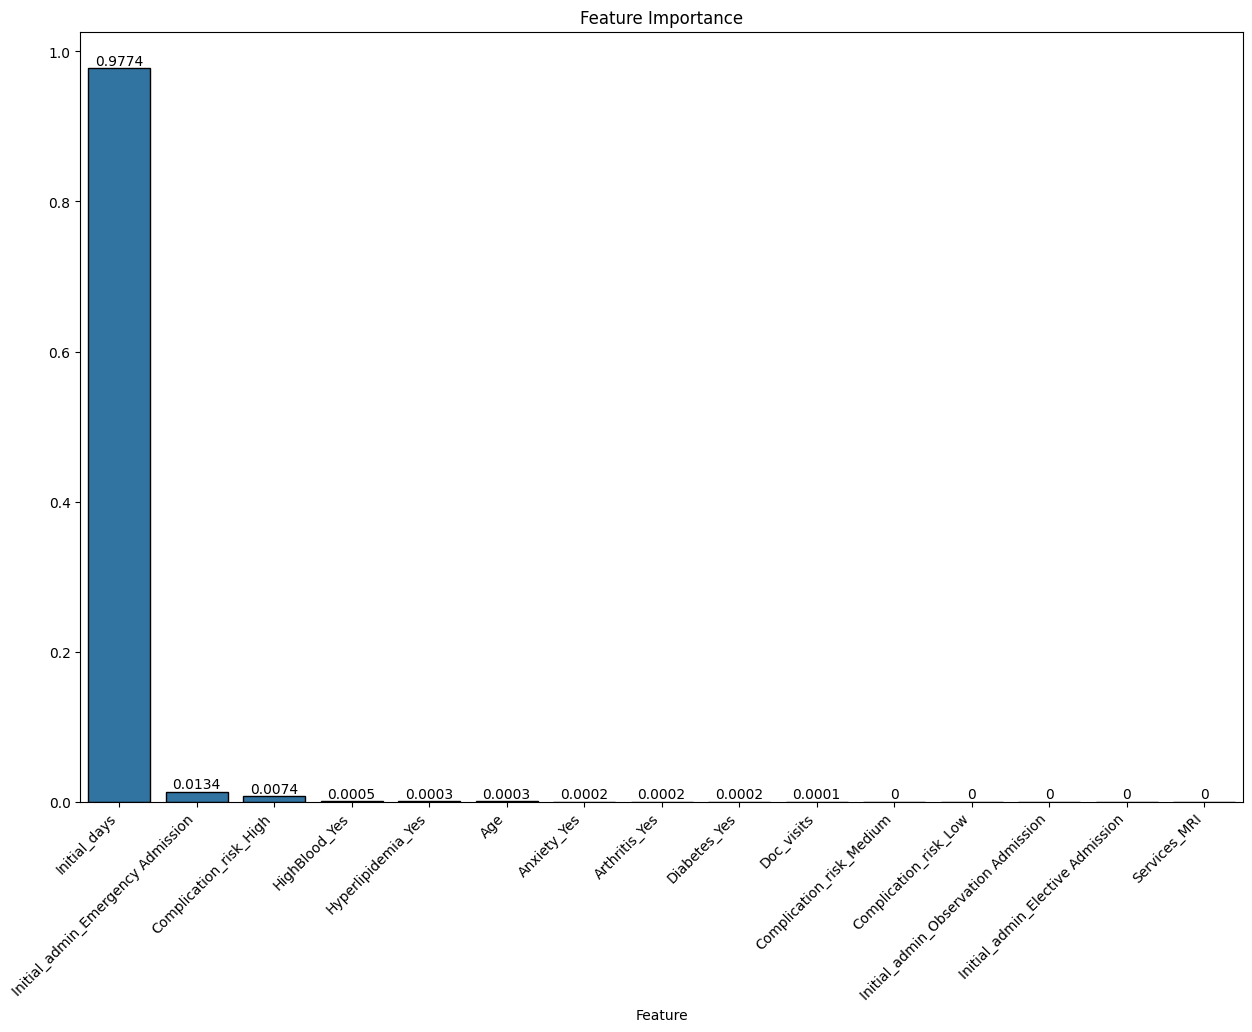

In [52]:
# Feature Importance [In-text citation: (GeeksforGeeks, 2024a)]
importances = rf_improved.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values('Importance', ascending=False)
print(feature_importances_df)

# Plot visualization
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=feature_importances_df['Feature'], y=feature_importances_df['Importance'].round(4), data=feature_importances_df, edgecolor='black')
for i in ax.containers:
	ax.bar_label(i,)
plt.xticks(rotation=45, ha='right')
plt.ylabel(None)
plt.title('Feature Importance')
plt.show()